In [52]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [53]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [54]:
train.shape, test.shape

((79853, 12), (34224, 11))

In [55]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [56]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [57]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [58]:
test.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
      dtype='object')

In [59]:
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [60]:
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

<AxesSubplot:>

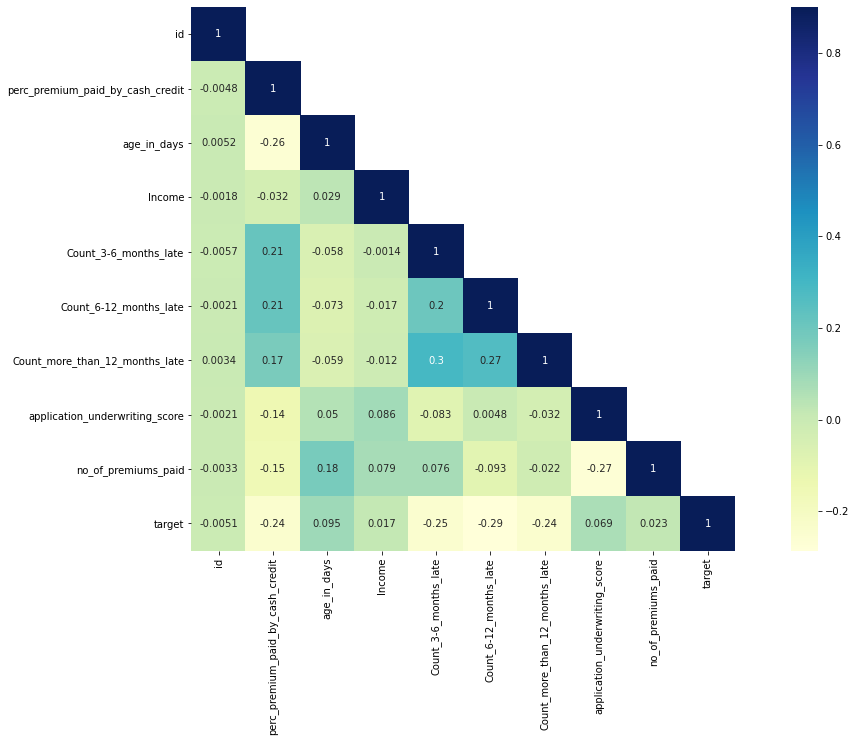

In [61]:
corr = train[['id','perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'target']].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='age_in_days'>

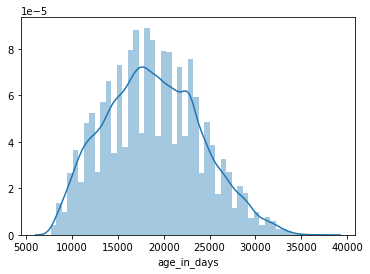

In [62]:
sn.distplot(train["age_in_days"])

In [63]:
train.fillna(0,inplace=True)

In [64]:
train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

In [65]:

test.fillna(0,inplace=True)

In [66]:
test.isnull().sum()


id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lModel = LogisticRegression()

In [69]:
train=train.drop('sourcing_channel',1)

In [70]:
X_train =train[train['age_in_days']<=28000]
validation = train[train['age_in_days']>28000]

In [71]:
X_train = train.drop('target',1)
y_train = train['target']
X_val = validation.drop('target',1)
y_val = validation['target']

In [72]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((79853, 10), (79853,), (3927, 10), (3927,))

In [73]:
X_train=pd.get_dummies(X_train)
X_val=pd.get_dummies(X_val)

In [74]:
lModel.fit(X_train,y_train)

LogisticRegression()

In [75]:
prediction = lModel.predict(X_val)

In [76]:
prediction.shape, X_train.shape, y_train.shape, X_val.shape, y_val.shape

((3927,), (79853, 11), (79853,), (3927, 11), (3927,))

In [77]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [78]:
rmsle(y_val,prediction)

0.1043494138107556

In [79]:
lModel.score(X_train,y_train)

0.937409990858202

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
dt_reg = DecisionTreeRegressor(max_depth=7)

In [82]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [83]:
predict = dt_reg.predict(X_val)

In [84]:
rmsle(y_val, predict)

0.09190389049150408

In [85]:
test=test.drop('sourcing_channel',1)


In [88]:
test_prediction=dt_reg.predict(test)

In [87]:
test=pd.get_dummies(test)

In [89]:
p1 = pd.DataFrame()

In [90]:
p1['target'] = test_prediction

In [91]:
p1.to_csv('p1.csv', header=True, index=False)

In [92]:

dt_reg.score(X_train, y_train)

0.19633481929129004